# Predict Cancer Death Rate by County

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

In [3]:
#Load Data
df_cancer = pd.read_csv('df_cancer.csv', encoding="ISO-8859-1")

In [4]:
df_cancer.shape

(3047, 34)

In [5]:
df_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              3047 non-null   float64
 1   avgDeathsPerYear         3047 non-null   int64  
 2   Deathrate                3047 non-null   float64
 3   incidenceRate            3047 non-null   float64
 4   medIncome                3047 non-null   int64  
 5   popEst2015               3047 non-null   int64  
 6   povertyPercent           3047 non-null   float64
 7   studyPerCap              3047 non-null   float64
 8   binnedInc                3047 non-null   object 
 9   MedianAge                3047 non-null   float64
 10  MedianAgeMale            3047 non-null   float64
 11  MedianAgeFemale          3047 non-null   float64
 12  County                   3047 non-null   object 
 13  AvgHouseholdSize         3047 non-null   float64
 14  PercentMarried          

## 4. Modeling

### 4.1 Data Splitting, Imputation , Scaling and Encoding

In [6]:
import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import __version__ as sklearn_version
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
import datetime

#from library.sb_utils import save_file

In [7]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
import math 

In [8]:
X = df_cancer.drop(columns=['Deathrate', 'County', 'State'])
y = df_cancer.Deathrate

In [9]:
X.head()

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,MedianAgeMale,MedianAgeFemale,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,1397.0,469,489.8,61898,260131,11.2,499.748204,j,39.3,36.9,41.7,2.54,52.5,11.5,39.5,6.9,23.2,19.6,51.9,8.0,75.1,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.0,70,411.6,48127,43269,18.6,23.111234,g,33.0,32.2,33.7,2.34,44.5,6.1,22.4,7.5,26.0,22.7,55.9,7.8,70.2,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.0,50,349.7,49348,21026,14.6,47.560164,g,45.0,44.0,45.8,2.62,54.2,24.0,36.6,9.5,29.0,16.0,45.9,7.0,63.7,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.0,202,430.4,44243,75882,17.1,342.637253,e,42.8,42.2,43.4,2.52,52.7,20.2,41.2,2.5,31.6,9.3,48.3,12.1,58.4,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.0,26,350.1,49955,10321,12.5,0.000000,g,48.3,47.8,48.9,2.34,57.8,14.9,43.0,2.0,33.4,15.0,48.2,4.8,61.6,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=42)

In [11]:
#pd.DataFrame(X_train).head()

In [12]:
cat_bins = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']

In [13]:
num_list = ['avgAnnCount', 'avgDeathsPerYear', 'incidenceRate', 'medIncome', 
            'popEst2015', 'povertyPercent', 'studyPerCap', 'MedianAge', 'MedianAgeMale', 
            'MedianAgeFemale', 'AvgHouseholdSize', 'PercentMarried', 'PctNoHS18_24', 'PctHS18_24', 
            'PctBachDeg18_24', 'PctHS25_Over', 'PctBachDeg25_Over', 'PctEmployed16_Over', 
            'PctUnemployed16_Over', 'PctPrivateCoverage', 'PctPrivateCoverageAlone', 'PctEmpPrivCoverage', 
            'PctPublicCoverage', 'PctPublicCoverageAlone', 'PctWhite', 'PctBlack', 'PctAsian', 'PctOtherRace', 
            'PctMarriedHouseholds', 'BirthRate']

In [14]:
blist = ['binnedInc']

In [15]:
# We create the preprocessing pipelines for both numeric and categorical data.
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

Bin_transformer = Pipeline(steps=[
    ("ordinal_encoder", OrdinalEncoder(categories= [cat_bins]))])

#combine numeric and categorical pipelines
preprocess_pipe = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_list),
        ('bincat', Bin_transformer, blist)])


In [16]:

# fit the pipelines to the training data
preprocess_pipe.fit_transform(X_train)

# apply the pipelines to the training and test data
X_train = preprocess_pipe.transform(X_train)
X_test = preprocess_pipe.transform(X_test)

In [17]:
X_train = pd.DataFrame(X_train, columns = (num_list+blist))

In [18]:
X_train.head()

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,MedianAgeFemale,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,binnedInc
0,-0.395989,-0.313079,-0.514776,-1.216887,-0.310357,0.819610,-0.28888,0.050276,1.209209,1.551543,-0.497547,0.710666,0.401975,0.141348,-1.323715,0.728347,-0.978466,-1.674465,0.646963,-1.075292,-0.005523,-1.315517,1.699384,1.241834,0.816995,-0.541774,-0.394545,-0.453103,0.603736,-0.415957,0.0
1,1.070419,-0.393116,0.093336,-0.145842,-0.348968,-0.770099,-0.28888,0.086012,1.800107,1.832973,-0.882801,1.309946,0.119514,-1.473368,2.623642,-0.318502,1.299823,0.666068,-1.589765,1.204429,-0.196513,-0.431344,0.333840,-1.071716,0.505452,-0.409662,-0.019744,-0.563402,0.305638,2.599053,5.0
2,-0.347362,-0.261945,-0.255576,-0.161401,-0.264898,-0.595231,-0.28888,-0.027500,0.637371,0.707253,-0.015980,-0.487893,-0.040138,0.860229,0.281990,1.043836,-0.806159,-0.155609,-0.206525,0.155185,-0.252686,0.016069,0.841042,0.370061,0.654669,-0.461395,-0.307964,-0.463634,-0.236884,-0.345826,4.0
3,-0.226577,-0.068523,-0.714161,-1.079999,-0.157246,1.232934,-0.28888,-0.044317,0.542065,0.519633,-0.425312,0.199086,-0.801554,0.074990,-0.007929,0.570603,-0.480689,-0.628695,0.087781,-0.617440,-0.881831,-0.687008,0.867053,0.604769,0.799673,-0.536022,-0.347211,-0.538258,-0.117413,-0.990820,1.0
4,-0.453244,-0.390893,-2.561187,0.866027,-0.341497,-1.151629,-0.28888,0.151176,2.219454,2.133165,-0.425312,1.339179,-0.113823,0.263005,-0.833083,-2.225777,3.367515,0.267679,-0.324248,0.517651,0.151764,-1.017242,-0.160357,-0.887303,0.863953,-0.626071,-0.159600,-0.563402,0.859057,-1.682126,8.0


In [19]:
X_test = pd.DataFrame(X_test, columns = (num_list+blist))

## Dummy model

In [28]:

#Calculate the mean of `y_train`
train_mean = y_train.mean()
train_mean

178.70745778611618

In [29]:
#Fit the dummy regressor on the training data
dumb_reg = DummyRegressor(strategy='mean')
dumb_reg.fit(X_train, y_train)
dumb_reg.constant_

array([[178.70745779]])

### 4.2 Linear Regression Model

### Linear regression base model

In [20]:
from sklearn.model_selection import cross_val_score
# function to get cross validation scores
def get_cv_scores(model):
    scores = cross_val_score(model,
                             X_train,
                             y_train,
                             cv=5,
                             scoring='r2')
    
    print('CV Mean: ', np.mean(scores))
    print('STD: ', np.std(scores))
    print('\n')

In [21]:
# Train model
lr = LinearRegression().fit(X_train, y_train)
# get cross val scores
get_cv_scores(lr)

CV Mean:  0.5192680855348089
STD:  0.04791262617150267




### Linear Regression Model 1

In [22]:
X_train

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,MedianAgeFemale,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,binnedInc
0,-0.395989,-0.313079,-0.514776,-1.216887,-0.310357,0.819610,-0.288880,0.050276,1.209209,1.551543,-0.497547,0.710666,0.401975,0.141348,-1.323715,0.728347,-0.978466,-1.674465,0.646963,-1.075292,-0.005523,-1.315517,1.699384,1.241834,0.816995,-0.541774,-0.394545,-0.453103,0.603736,-0.415957,0.0
1,1.070419,-0.393116,0.093336,-0.145842,-0.348968,-0.770099,-0.288880,0.086012,1.800107,1.832973,-0.882801,1.309946,0.119514,-1.473368,2.623642,-0.318502,1.299823,0.666068,-1.589765,1.204429,-0.196513,-0.431344,0.333840,-1.071716,0.505452,-0.409662,-0.019744,-0.563402,0.305638,2.599053,5.0
2,-0.347362,-0.261945,-0.255576,-0.161401,-0.264898,-0.595231,-0.288880,-0.027500,0.637371,0.707253,-0.015980,-0.487893,-0.040138,0.860229,0.281990,1.043836,-0.806159,-0.155609,-0.206525,0.155185,-0.252686,0.016069,0.841042,0.370061,0.654669,-0.461395,-0.307964,-0.463634,-0.236884,-0.345826,4.0
3,-0.226577,-0.068523,-0.714161,-1.079999,-0.157246,1.232934,-0.288880,-0.044317,0.542065,0.519633,-0.425312,0.199086,-0.801554,0.074990,-0.007929,0.570603,-0.480689,-0.628695,0.087781,-0.617440,-0.881831,-0.687008,0.867053,0.604769,0.799673,-0.536022,-0.347211,-0.538258,-0.117413,-0.990820,1.0
4,-0.453244,-0.390893,-2.561187,0.866027,-0.341497,-1.151629,-0.288880,0.151176,2.219454,2.133165,-0.425312,1.339179,-0.113823,0.263005,-0.833083,-2.225777,3.367515,0.267679,-0.324248,0.517651,0.151764,-1.017242,-0.160357,-0.887303,0.863953,-0.626071,-0.159600,-0.563402,0.859057,-1.682126,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2127,-0.206185,-0.061853,-0.048941,-0.463236,-0.140801,0.104241,-0.229579,-0.094767,0.046473,-0.024465,0.272960,-0.268645,-0.224351,0.727512,-0.007929,1.172900,-0.748723,-0.578897,0.058351,-0.169126,-0.005523,0.122596,0.828037,0.705359,0.720577,-0.474954,-0.305512,-0.534010,-0.243522,-0.130923,3.0
2128,-0.380303,-0.324196,0.886354,1.207567,-0.296647,-1.247012,-0.288880,0.004031,1.018596,0.969921,0.730449,-0.677909,-1.415599,-1.108398,3.649509,-1.695182,2.276233,0.989758,-0.765707,0.584422,-0.005523,0.250428,-0.186367,0.118589,0.548994,-0.393192,-0.176299,-0.288837,0.323484,-1.212346,8.0
2129,-0.021087,0.060425,0.159506,0.232429,0.062333,-0.674717,0.937328,-0.216687,-0.963773,-1.093898,-0.184529,-0.677909,-1.587532,-0.942502,0.505004,-1.035523,1.204097,1.350798,-0.706846,1.194891,1.567339,1.624625,-0.992688,-0.920833,0.479827,-0.528629,1.229774,-0.384152,-0.557245,-0.353065,6.0
2130,1.070419,-0.390893,0.093336,0.325615,-0.348794,-1.024453,-0.288880,0.035562,1.094841,1.495257,-0.569782,2.523122,-1.169981,-0.677069,0.036674,0.398518,0.802046,1.039557,-1.736918,0.985042,-0.005523,-0.655050,-0.511496,-1.105246,0.812459,-0.556825,-0.267121,-0.523133,1.719896,1.664770,6.0


In [87]:
kbest = SelectKBest(f_regression) 

    
pipeline = make_pipeline(kbest, LinearRegression())
# define search parameters
k = [k+1 for k in range(len(X_train))]
params = {'selectkbest__k': k}
search = GridSearchCV(pipeline, param_grid=params, n_jobs=-1, cv=5, verbose=2)
# execute search
result = search.fit(X_train, y_train)
# summarize result
print(f"Best Score: {result.best_score_}")
print(f"Best Hyperparameters: {result.best_params_}")

Fitting 5 folds for each of 2132 candidates, totalling 10660 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 2192 tasks      | elapsed:    5.2s


Best Score: 0.5219288829697899
Best Hyperparameters: {'selectkbest__k': 26}


[Parallel(n_jobs=-1)]: Done 10660 out of 10660 | elapsed:   10.6s finished


In [24]:
score_mean = result.cv_results_['mean_test_score']
score_std = result.cv_results_['std_test_score']
cv_k = [k for k in result.cv_results_['param_selectkbest__k']]

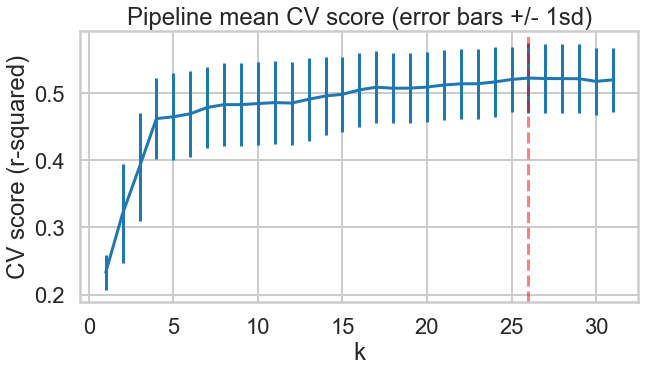

In [25]:
#Assign the value of k from the above dict of `best_params_` and assign it to `best_k`
best_k = result.best_params_['selectkbest__k']
plt.subplots(figsize=(10, 5))
plt.errorbar(cv_k, score_mean, yerr=score_std)
plt.axvline(x=best_k, c='r', ls='--', alpha=.5)
plt.xlabel('k')
plt.ylabel('CV score (r-squared)')
plt.title('Pipeline mean CV score (error bars +/- 1sd)');

In [26]:
selected = result.best_estimator_.named_steps.selectkbest.get_support()
print(selected)

[ True  True  True  True  True  True False False False False False  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True]


In [27]:
#get the matching feature names from the column names of the dataframe,
coefs = result.best_estimator_.named_steps.linearregression.coef_
features = X_train.columns[selected]
pd.Series(coefs, index=features).sort_values(ascending=False)

avgDeathsPerYear           11.203846
incidenceRate              10.910853
PercentMarried              5.347856
medIncome                   5.300699
PctPublicCoverageAlone      3.790988
PctEmpPrivCoverage          3.593822
PctHS25_Over                2.383289
PctHS18_24                  2.102319
povertyPercent              0.837716
PctPrivateCoverageAlone     0.249199
PctUnemployed16_Over       -0.015172
PctAsian                   -0.084725
PctNoHS18_24               -1.048261
PctBachDeg18_24            -1.296108
BirthRate                  -1.681699
PctEmployed16_Over         -2.186639
binnedInc                  -2.331142
PctBlack                   -2.812817
PctOtherRace               -2.864460
PctWhite                   -3.097777
avgAnnCount                -4.112622
PctPrivateCoverage         -5.310665
PctPublicCoverage          -5.530087
PctBachDeg25_Over          -7.465091
PctMarriedHouseholds       -7.712393
popEst2015                 -8.087723
dtype: float64

In [141]:
y_te_pred = result.best_estimator_.predict(X_test)

In [142]:
r2_score(y_test, y_te_pred)

0.4611867471322454

In [143]:
mean_absolute_error(y_test, y_te_pred)

15.661348882899386

In [144]:
mean_squared_error(y_test, y_te_pred)

438.43780502982867

### Ridge Regression Model 2

In [40]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

In [41]:
ridge = Ridge(random_state= 42)
# find optimal alpha with grid search
param_grid = { 'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid = GridSearchCV( estimator=ridge, param_grid=param_grid, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
grid_result = grid.fit(X_train, y_train)
print('Best Score MSE: ', -grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Best Score MSE:  356.4571709887121
Best Params:  {'alpha': 10}


[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    2.0s finished


#### Ridge optimizing R-squared

In [93]:
ridge = Ridge(random_state= 42)
# find optimal alpha with grid search
param_grid = { 'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid = GridSearchCV( estimator=ridge, param_grid=param_grid, scoring='r2', verbose=1, n_jobs=-1)
grid_result = grid.fit(X_train, y_train)
print('Best Score R-squared: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Best Score R-squared:  0.5200566337510354
Best Params:  {'alpha': 10}


[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    2.1s finished


In [137]:
y_te_pred =grid_result.best_estimator_.predict(X_test)

In [138]:
r2_score(y_test, y_te_pred)

0.4635285959523937

In [139]:
mean_absolute_error(y_test, y_te_pred)

15.637053403625288

In [140]:
mean_squared_error(y_test, y_te_pred)

436.53221890893656

### Lasso Regression Model 3

#### Lasso optimizing MSE 

In [47]:
lasso = Lasso(random_state= 42)
# find optimal alpha with grid search
param_grid = { 'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid = GridSearchCV( estimator=lasso, param_grid=param_grid, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
grid_result = grid.fit(X_train, y_train)
print('Best Score MSE: ', -grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Best Score MSE:  356.0619084435533
Best Params:  {'alpha': 0.1}


[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    2.2s finished


#### Lasso optimizing R-squared

In [99]:
lasso = Lasso(random_state= 42)
# find optimal alpha with grid search
param_grid = { 'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid = GridSearchCV( estimator=lasso, param_grid=param_grid, scoring='r2', verbose=1, n_jobs=-1)
lasso_result = grid.fit(X_train, y_train)
print('Best Score R-squared: ', lasso_result.best_score_)
print('Best Params: ', lasso_result.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
Best Score R-squared:  0.5203429454127961
Best Params:  {'alpha': 0.1}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  35 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    0.1s finished


In [132]:
y_te_pred =lasso_result.best_estimator_.predict(X_test)

In [133]:
r2_score(y_test, y_te_pred)

0.46877705503939027

In [134]:
mean_absolute_error(y_test, y_te_pred)

15.566729382146194

In [135]:
mean_squared_error(y_test, y_te_pred)

432.2614945538019

### ElasticNet Regression Model 4

#### ElasticNet optimizing MSE 

In [104]:
elastic_net = ElasticNet(random_state= 42)
# find optimal alpha with grid search
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'l1_ratio': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
}
grid = GridSearchCV( estimator=elastic_net, param_grid=param_grid, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
el_result = grid.fit(X_train, y_train)
print('Best Score MSE: ', -el_result.best_score_)
print('Best Params: ', el_result.best_params_)

Fitting 5 folds for each of 77 candidates, totalling 385 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.5s


Best Score MSE:  356.0619084435533
Best Params:  {'alpha': 0.1, 'l1_ratio': 1}


[Parallel(n_jobs=-1)]: Done 385 out of 385 | elapsed:    2.1s finished


In [125]:
y_te_pred =el_result.best_estimator_.predict(X_test)

In [126]:
r2_score(y_test, y_te_pred)

0.46877705503939027

In [127]:
mean_absolute_error(y_test, y_te_pred)

15.566729382146194

In [128]:
mean_squared_error(y_test, y_te_pred)

432.2614945538019

#### ElasticNet optimizing R-squared 

In [50]:
elastic_net = ElasticNet(random_state= 42)
# find optimal alpha with grid search
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'l1_ratio': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
}
grid = GridSearchCV( estimator=elastic_net, param_grid=param_grid, scoring='r2', verbose=1, n_jobs=-1)
grid_result = grid.fit(X_train, y_train)
print('Best Score R-squared: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Fitting 5 folds for each of 77 candidates, totalling 385 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.4s


Best Score R-squared:  0.5203429454127961
Best Params:  {'alpha': 0.1, 'l1_ratio': 1}


[Parallel(n_jobs=-1)]: Done 385 out of 385 | elapsed:    1.1s finished


### 3.4 XGBoost Model 5

In [52]:
import xgboost as xgb
from xgboost import XGBRegressor

#### XGB optimizing MSE 

In [53]:
param_grid={"learning_rate": ( 0.05, 0.10, 0.15),
            "max_depth": [ 3, 6],
            "reg-lambda":[0.5, 1, 10, 40],
            "reg_alpha":[0, 1, 10],
            "gamma":[ 0.0, 0.1, 0.2],
            "colsample_bytree":[ 0.3, 0.4],
            'n_estimators': [500, 1000]}
gsc = GridSearchCV(
            estimator=xgb.XGBRegressor(), param_grid = param_grid,
            cv=3, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

gsc.fit(X_train, y_train)

print("Best parameters:", gsc.best_params_)
print("Lowest MSE: ", -gsc.best_score_)
print("Lowest RMSE: ", (-gsc.best_score_)**(1/2.0))


Fitting 3 folds for each of 864 candidates, totalling 2592 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   53.4s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed: 10.6min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed: 15.1min
[Parallel(n_jobs=-1)]: Done 2592 out of 2592 | elapsed: 16.3min finished


[03:02:04] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1593723618214/work/src/learner.cc:480: 
Parameters: { reg-lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Best parameters: {'colsample_bytree': 0.4, 'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 1000, 'reg-lambda': 0.5, 'reg_alpha': 10}
Lowest MSE:  271.8893997000118
Lowest RMSE:  16.489069097435785


In [59]:
param_grid={"learning_rate": [0.05, 0.10],
            "max_depth": [3],
            "min_child_weight": [ 1, 3, 5, 7],
            "reg_alpha":[10, 50],
            "gamma":[ 0.0, 0.1, 0.2],
            "colsample_bytree":[ 0.3, 0.4, 0.5],
            'n_estimators': [1000]}
gsc = GridSearchCV(
            estimator=xgb.XGBRegressor(), param_grid = param_grid,
            cv=3, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

gsc.fit(X_train, y_train)

print("Best parameters:", gsc.best_params_)
print("Lowest MSE: ", -gsc.best_score_)
print("Lowest RMSE: ", (-gsc.best_score_)**(1/2.0))

Fitting 3 folds for each of 144 candidates, totalling 432 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   52.2s
[Parallel(n_jobs=-1)]: Done 432 out of 432 | elapsed:  2.7min finished


Best parameters: {'colsample_bytree': 0.5, 'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 5, 'n_estimators': 1000, 'reg_alpha': 50}
Lowest MSE:  256.46986679292803
Lowest RMSE:  16.01467660594269


#### XGB optimizing R-squaredN 

In [57]:
param_grid={"learning_rate": [0.05, 0.10],
            "max_depth": [3],
            "min_child_weight": [ 1, 3, 5, 7],
            "reg_alpha":[10, 50],
            "gamma":[ 0.0, 0.1, 0.2],
            "colsample_bytree":[ 0.3, 0.4, 0.5],
            'n_estimators': [1000]}
gsc = GridSearchCV(
            estimator=xgb.XGBRegressor(), param_grid = param_grid,
            cv=3, scoring='r2', verbose=1, n_jobs=-1)

gsc.fit(X_train, y_train)

print("Best parameters:", gsc.best_params_)
print("R-squared: ", gsc.best_score_)


Fitting 3 folds for each of 144 candidates, totalling 432 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   12.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   56.1s
[Parallel(n_jobs=-1)]: Done 432 out of 432 | elapsed:  2.7min finished


Best parameters: {'colsample_bytree': 0.5, 'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 5, 'n_estimators': 1000, 'reg_alpha': 50}
R-squared:  0.6585550004422177


In [60]:
xgbbest_model = gsc.best_estimator_

In [121]:
y_te_pred =xgbbest_model.predict(X_test)

In [122]:
r2_score(y_test, y_te_pred)

0.6984209603007427

In [123]:
mean_absolute_error(y_test, y_te_pred)

11.079733825016543

In [124]:
 mean_squared_error(y_test, y_te_pred)

245.39792127421674

### 3.5 Random Forest Model

In [62]:
from sklearn.ensemble import RandomForestRegressor

In [61]:
rfr = RandomForestRegressor(random_state= 42)
grid_params = {
    'n_estimators': [100,500,1000],
    'max_depth': [3,6,12,24]}

rf_grid_cv = GridSearchCV(estimator=rfr, scoring='r2', param_grid=grid_params, cv=3, verbose=0)

rf_result =rf_grid_cv.fit(X_train, y_train)

# summarize result
print(f"Best Score R-squared: {rf_result.best_score_}")
print(f"Best Hyperparameters: {rf_result.best_params_}")

Best Score R-squared: 0.5370039165753508
Best Hyperparameters: {'max_depth': 24, 'n_estimators': 1000}


In [63]:
rfr = RandomForestRegressor(random_state= 42)
grid_params = {
    'n_estimators': [100,500,1000],
    'max_depth': [3,6,12,24]}

rf_grid_cv = GridSearchCV(estimator=rfr, scoring='neg_mean_squared_error', param_grid=grid_params, cv=3, verbose=0)

rf_result =rf_grid_cv.fit(X_train, y_train)

# summarize result
print(f"Best Score MSE: {-rf_result.best_score_}")
print(f"Best Hyperparameters: {rf_result.best_params_}")

Best Score MSE: 348.16146169764306
Best Hyperparameters: {'max_depth': 24, 'n_estimators': 1000}


In [117]:
y_te_pred =rf_result.best_estimator_.predict(X_test)

In [118]:
r2_score(y_test, y_te_pred)

0.5349091887972601

In [119]:
mean_absolute_error(y_test, y_te_pred)

14.337646713939554

In [120]:
mean_squared_error(y_test, y_te_pred)

378.449107029147

## 4. Final Model Selection

### XGBoost Model

In [64]:
xgbbest_model = gsc.best_estimator_
# 'neg_mean_absolute_error' uses the (negative of) the mean absolute error
xgb_neg_mae = cross_validate(xgbbest_model, X_train, y_train, 
                            scoring='neg_mean_absolute_error', cv=5, n_jobs=-1)

In [65]:
xgb_mae_mean = np.mean(-1 * xgb_neg_mae['test_score'])
xgb_mae_std = np.std(-1 * xgb_neg_mae['test_score'])
xgb_mae_mean, xgb_mae_std

(11.354562736097094, 0.46471242217060943)

In [66]:
mean_absolute_error(y_test, xgbbest_model.predict(X_test))

11.079733825016543

### RF Model

In [67]:
# 'neg_mean_absolute_error' uses the (negative of) the mean absolute error
rf_neg_mae = cross_validate(rf_result.best_estimator_, X_train, y_train, 
                            scoring='neg_mean_absolute_error', cv=5, n_jobs=-1)

In [68]:
rf_mae_mean = np.mean(-1 * rf_neg_mae['test_score'])
rf_mae_std = np.std(-1 * rf_neg_mae['test_score'])
rf_mae_mean, rf_mae_std

(13.62243270653704, 0.6209810229737049)

In [69]:
mean_absolute_error(y_test, rf_result.predict(X_test))

14.337646713939554

XGBoost model is the best model with the highest R-squared and the lowest MSE, RMSE and MAE

## Save best model

In [71]:
import os
import sys

In [75]:
import pickle

In [76]:
best_model = xgbbest_model
best_model.version = '1.0'
best_model.pandas_version = pd.__version__
best_model.numpy_version = np.__version__
best_model.sklearn_version = sklearn_version
best_model.X_columns = [col for col in X_train.columns]
best_model.build_datetime = datetime.datetime.now()

In [77]:
# save the model to disk
filename = 'cancer_deathrate.sav'
pickle.dump(best_model, open(filename, 'wb'))